Aula 1

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [4]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='str')

In [5]:
df.rename(columns={'work_year': 'ano', 'experience_level': 'senioridade', 'employment_type': 'contrato', 'job_title': 'cargo', 'salary': 'salario', 'salary_currency': 'moeda', 'salary_in_usd': 'usd', 'employee_residence': 'residencia', 'remote_ratio': 'remoto', 'company_location': 'empresa', 'company_size': 'tamanho_empresa'}, inplace=True)

In [6]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [7]:
df["senioridade"] = df["senioridade"].replace({
    'EN': 'Júnior',
    'MI': 'Pleno',
    'SE': 'Sênior',
    'EX': 'Executivo'
})

In [8]:
df["remoto"] = df["remoto"].replace({
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
})

In [9]:
df["tamanho_empresa"] = df["tamanho_empresa"].replace({
    'M': 'Médio',
    'S': 'Pequeno',
    'L': 'Grande'
})

In [10]:
df.describe(include = ['object', 'string'])

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Sênior,FT,Data Scientist,USD,US,Presencial,US,Médio
freq,77241,132563,17314,126140,119579,105312,119641,129561


Aula 2

In [11]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,FT,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Sênior,FT,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,FT,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,FT,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Júnior,FT,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [12]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [13]:
df_salarios = pd.DataFrame({
    'nome': ["Ana",'Bruno','Carla','Daniel','Val'],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
})
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median().round(2))
df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carla,5000.0,5000.00,5000.0
3,Daniel,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [14]:
df_temperaturas = pd.DataFrame({
    'Dia': ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    'Temperatura': [30, np.nan, np.nan, 28, 27]
})
df_temperaturas['preenchido_ffill'] = df_temperaturas['Temperatura'].ffill()
df_temperaturas['preenchido_bfill'] = df_temperaturas['Temperatura'].bfill()
df_temperaturas

,Dia,Temperatura,preenchido_ffill,preenchido_bfill
0,Segunda,30.0,30.0,30.0
1,Terça,NaN,30.0,28.0
2,Quarta,NaN,30.0,28.0
3,Quinta,28.0,28.0,28.0
4,Sexta,27.0,27.0,27.0


In [15]:
df_cidades = pd.DataFrame({
    'nome': ["Ana", "Bruno", "Carla", "Daniel", "Val"],
    'cidade': ["São Paulo", np.nan, "Curitiba", np.nan, "Belém"]
})

df_cidades['cidade_preenchida'] = df_cidades['cidade'].fillna('Não informado')
df_cidades

,nome,cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carla,Curitiba,Curitiba
3,Daniel,NaN,Não informado
4,Val,Belém,Belém


In [16]:
df_limpo = df.dropna()
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,FT,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Sênior,FT,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,FT,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,FT,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Júnior,FT,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [17]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('Int64'))

Aula 3

In [18]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Sênior,FT,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Sênior,FT,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,FT,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,FT,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Júnior,FT,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

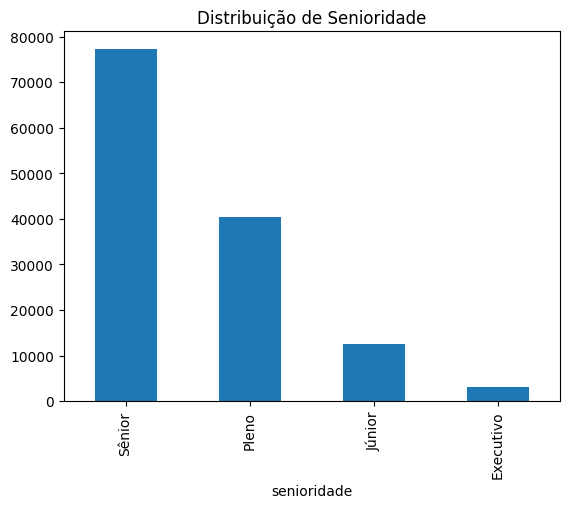

In [19]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title='Distribuição de Senioridade')


In [20]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

<Axes: xlabel='senioridade', ylabel='usd'>

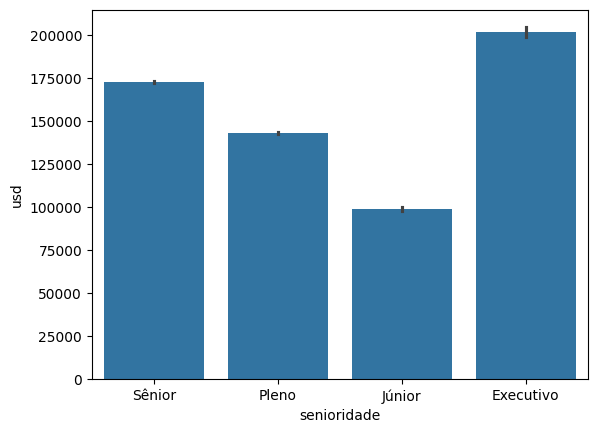

In [21]:
sns.barplot(data=df_limpo, x='senioridade', y='usd')

In [22]:
import matplotlib.pyplot as plt

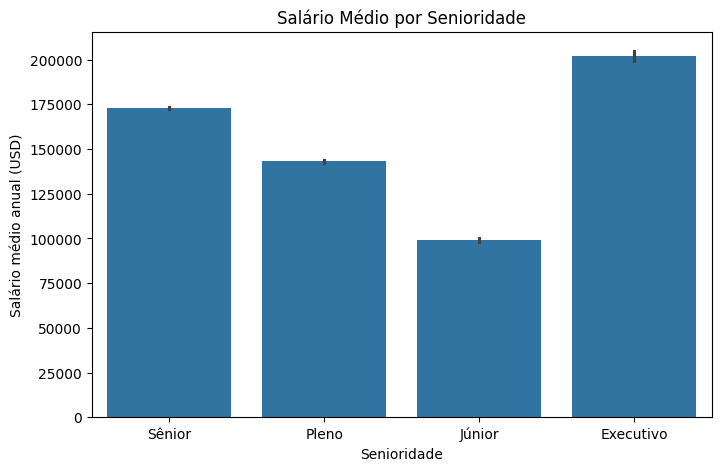

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd')
plt.title('Salário Médio por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio anual (USD)')
plt.show()

In [24]:
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

senioridade
Executivo    202027.667813
Sênior       172850.838301
Pleno        143044.845979
Júnior        99034.963267
Name: usd, dtype: float64

In [25]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True).index
ordem

Index(['Júnior', 'Pleno', 'Sênior', 'Executivo'], dtype='str', name='senioridade')

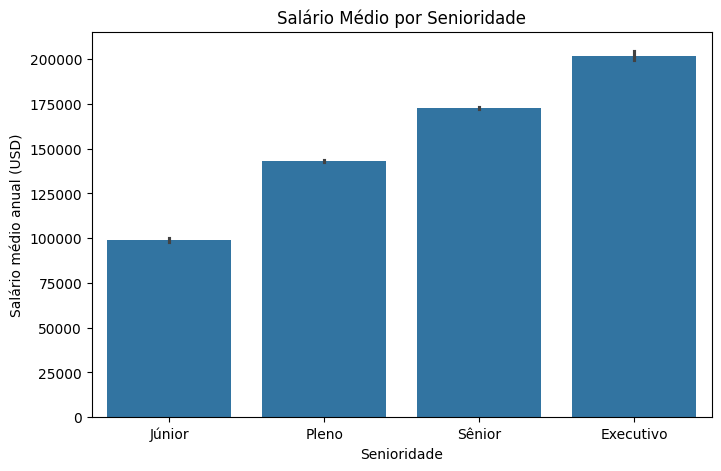

In [26]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x='senioridade', y='usd', order=ordem)
plt.title('Salário Médio por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário médio anual (USD)')
plt.show()

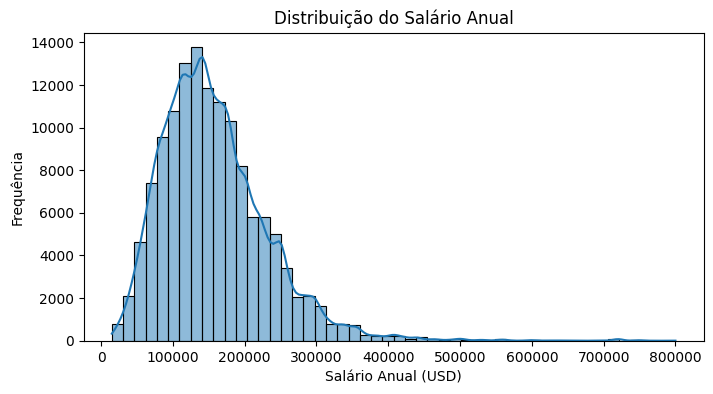

In [27]:
plt.figure(figsize=(8,4))
sns.histplot(data=df_limpo, x='usd', bins=50, kde=True)
plt.title('Distribuição do Salário Anual')
plt.xlabel('Salário Anual (USD)')
plt.ylabel('Frequência')
plt.show()

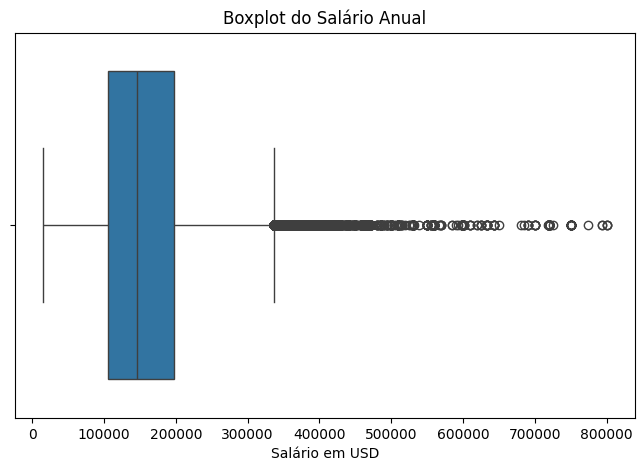

In [28]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_limpo['usd'])
plt.title('Boxplot do Salário Anual')
plt.xlabel('Salário em USD')
plt.show()

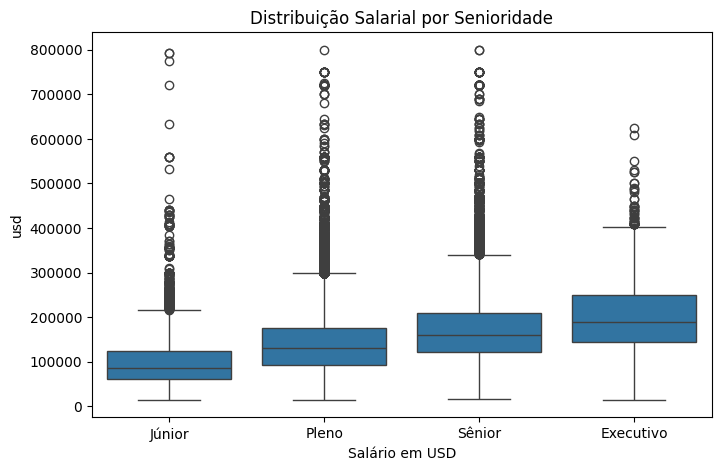

In [29]:
ordem_senioridade = ['Júnior', 'Pleno', 'Sênior', 'Executivo']
plt.figure(figsize=(8,5))
sns.boxplot(data=df_limpo, x='senioridade', y='usd', order=ordem_senioridade)
plt.title('Distribuição Salarial por Senioridade')
plt.xlabel('Salário em USD')
plt.show()

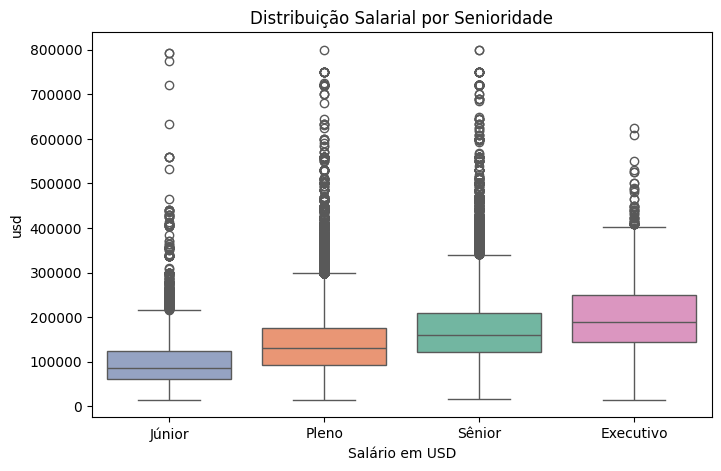

In [30]:
ordem_senioridade = ['Júnior', 'Pleno', 'Sênior', 'Executivo']
plt.figure(figsize=(8,5))
sns.boxplot(data=df_limpo, x='senioridade', y='usd', order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title('Distribuição Salarial por Senioridade')
plt.xlabel('Salário em USD')
plt.show()

In [31]:
import plotly.express as px

In [37]:
media_salario = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()
fig = px.bar(media_salario,
    x='senioridade',
    y='usd',
    title='Media Salarial por Senioridade',
    labels={'senioridade': 'Nível de Senioridade', 'usd': 'Média Salarial Anual'})

fig.show()

In [40]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']
fig = px.pie(remoto_contagem,
    values='quantidade',
    names='tipo_trabalho',
    title='Proporção de Trabalho Remoto',
    hole=0.4)
fig.update_traces(textinfo='percent+label')
fig.show()